# Thermovision segmentation (altitude & angle version)

## HIT-UAV Dataset

*HIT-UAV provides essential flight data for each image, including flight altitude, camera perspective, date, and daylight intensity. <br>
For each image, the authors have manually annotated object instances with bounding boxes of two types (oriented and standard) <br>to tackle the challenge of significant overlap of object instances in aerial images.*

In [1]:
from src.utils.readXML import readXML

DATA_PATH = "data/HIT-UAV-Infrared-Thermal-Dataset/rotate_xml/Annotations"

ImportError: cannot import name 'readXML' from 'src.utils.readXML' (c:\Users\agata\Desktop\UNI\MSC\MP\thermal-segmentation\src\utils\readXML.py)

In [15]:
annotation['0_100_30_0_03280']

{'picname': '0_100_30_0_03280.jpg',
 'size': {'width': 640, 'height': 512, 'depth': 1},
 'nobbox': [],
 'robbox': [{'category': 'Car',
   'cx': 215.984,
   'cy': 120.9863,
   'w': 32.276,
   'h': 15.9103,
   'angle': 2.589049,
   'difficult': False},
  {'category': 'Car',
   'cx': 373.7907,
   'cy': 97.5358,
   'w': 27.4285,
   'h': 19.3339,
   'angle': 0.559865,
   'difficult': False},
  {'category': 'Car',
   'cx': 134.6054,
   'cy': 141.7191,
   'w': 25.4252,
   'h': 18.4471,
   'angle': 2.279669,
   'difficult': False},
  {'category': 'Car',
   'cx': 32.4545,
   'cy': 200.0871,
   'w': 27.7836,
   'h': 13.3051,
   'angle': 0.796474,
   'difficult': False},
  {'category': 'Car',
   'cx': 43.7676,
   'cy': 192.7359,
   'w': 31.907,
   'h': 17.0008,
   'angle': 0.650521,
   'difficult': False},
  {'category': 'Car',
   'cx': 58.5022,
   'cy': 187.6378,
   'w': 14.5995,
   'h': 32.0022,
   'angle': 2.335935,
   'difficult': False},
  {'category': 'Car',
   'cx': 67.869,
   'cy': 181.10

In [10]:
# note: use rotation_xml
with open(DATA_PATH+"/annotations/train.json", 'r') as file:
    data_dict = json.load(file)

print([*data_dict.keys()])
print(data_dict['images'])

['info', 'licenses', 'scenarios', 'weather', 'images', 'categories', 'annotations']
[{'id': 0, 'width': 640, 'height': 512, 'depth': 1, 'filename': '1_130_90_0_04077.jpg', 'scenario': '1', 'weather': '0', 'perspective': '90', 'altitude': '130', 'date': '20210116'}, {'id': 1, 'width': 640, 'height': 512, 'depth': 1, 'filename': '0_110_50_0_08412.jpg', 'scenario': '0', 'weather': '0', 'perspective': '50', 'altitude': '110', 'date': '20210121'}, {'id': 2, 'width': 640, 'height': 512, 'depth': 1, 'filename': '1_60_40_0_04117.jpg', 'scenario': '1', 'weather': '0', 'perspective': '40', 'altitude': '60', 'date': '20210116'}, {'id': 3, 'width': 640, 'height': 512, 'depth': 1, 'filename': '0_80_80_0_02266.jpg', 'scenario': '0', 'weather': '0', 'perspective': '80', 'altitude': '80', 'date': '20210115'}, {'id': 4, 'width': 640, 'height': 512, 'depth': 1, 'filename': '1_130_50_0_03905.jpg', 'scenario': '1', 'weather': '0', 'perspective': '50', 'altitude': '130', 'date': '20210116'}, {'id': 5, 'wid

In [27]:
data_dict['images'][0]

{'id': 0,
 'width': 640,
 'height': 512,
 'depth': 1,
 'filename': '1_130_90_0_04077.jpg',
 'scenario': '1',
 'weather': '0',
 'perspective': '90',
 'altitude': '130',
 'date': '20210116'}

In [29]:
data_dict['annotations'][10]

{'id': 10,
 'image_id': 2,
 'category_id': 1,
 'difficult': False,
 'bbox': [306.3285, 263.8251, 61.4045, 23.751, 0.428046]}

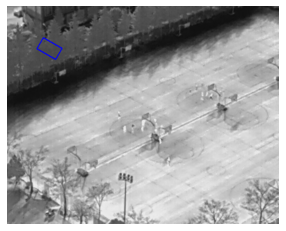

In [25]:
import cv2
import numpy as np
import math

def add_oriented_bounding_box(image_path, xc, yc, w, h, theta):
    img = cv2.imread(image_path)
    
    # Calculate the angle in radians
    angle_rad = math.radians(theta)
    half_w = w / 2
    half_h = h / 2
    
    corners = [
        (xc + (math.cos(angle_rad) * half_w + math.sin(angle_rad) * half_h),
         yc + (math.sin(angle_rad) * half_w - math.cos(angle_rad) * half_h)),
        (xc + (math.cos(angle_rad) * half_w - math.sin(angle_rad) * half_h),
         yc + (math.sin(angle_rad) * half_w + math.cos(angle_rad) * half_h)),
        (xc - (math.cos(angle_rad) * half_w + math.sin(angle_rad) * half_h),
         yc - (math.sin(angle_rad) * half_w - math.cos(angle_rad) * half_h)),
        (xc - (math.cos(angle_rad) * half_w - math.sin(angle_rad) * half_h),
         yc - (math.sin(angle_rad) * half_w + math.cos(angle_rad) * half_h))
    ]
    
    corners = [(int(x), int(y)) for x, y in corners]
    cv2.polylines(img, 
                  [np.array(corners, dtype=np.int32)], 
                  isClosed=True, 
                  color=(0, 0, 255), 
                  thickness=2)
    
    plt.imshow(img)
    plt.axis("off")

# Example usage
image_path = 'data/HIT-UAV-Infrared-Thermal-Dataset/rotate_json/train/0_60_30_0_01620.jpg'
xc, yc, w, h, theta = 100, 100, 50, 30, 30  # Replace these values with your data
add_oriented_bounding_box(image_path, xc, yc, w, h, theta)


In [ ]:
"""
TODO
- Load the train set with angle and altitude added 
(different colors, annotations etc, use xml!)
- look at michał paper



"""
